In [76]:
# import packages
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Point
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import time
import pandas_profiling
from celluloid import Camera
%matplotlib inline


In [3]:
# Read in Data Frame and inspect it
df = pd.read_csv('CSV_MASTERS/population.csv')
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,major_classification,subclass_category,country,country_abrv,density_km_squared,density_mi_squared
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",Chondrite,L,Germany,DE,233.0,90.0
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",Chondrite,H,Denmark,DK,133.0,52.0
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",Chondrite,E,Canada,CA,4.0,1.0
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",Achondrite,Acapulcoite,Mexico,MX,64.0,25.0
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",Chondrite,L,Argentina,AR,16.0,6.0


In [5]:
# Make a coordinates column that has a value of a list of longitude and latitude
df['coordinates'] = df[['reclong', 'reclat']].values.tolist()
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,major_classification,subclass_category,country,country_abrv,density_km_squared,density_mi_squared,coordinates
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",Chondrite,L,Germany,DE,233.0,90.0,"[6.08333, 50.775]"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",Chondrite,H,Denmark,DK,133.0,52.0,"[10.23333, 56.18333000000001]"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",Chondrite,E,Canada,CA,4.0,1.0,"[-113.0, 54.21666999999999]"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",Achondrite,Acapulcoite,Mexico,MX,64.0,25.0,"[-99.9, 16.883329999999994]"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",Chondrite,L,Argentina,AR,16.0,6.0,"[-64.95, -33.16667]"


In [7]:
# Make the coordinate column a Point object
df['coordinates'] = df['coordinates'].apply(Point)
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,major_classification,subclass_category,country,country_abrv,density_km_squared,density_mi_squared,coordinates
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",Chondrite,L,Germany,DE,233.0,90.0,POINT (6.08333 50.775)
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",Chondrite,H,Denmark,DK,133.0,52.0,POINT (10.23333 56.18333000000001)
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",Chondrite,E,Canada,CA,4.0,1.0,POINT (-113 54.21666999999999)
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",Achondrite,Acapulcoite,Mexico,MX,64.0,25.0,POINT (-99.90000000000001 16.88332999999999)
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",Chondrite,L,Argentina,AR,16.0,6.0,POINT (-64.95 -33.16667)


In [11]:
df.sort_values(by=['year'], axis = 0, inplace = True)
df.head(10)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,major_classification,subclass_category,country,country_abrv,density_km_squared,density_mi_squared,coordinates
674,Nogata,16988,Valid,L6,472.0,Fell,860.0,33.72500,130.75000,"(33.725, 130.75)",Chondrite,L,Japan,JP,337.0,130.0,POINT (130.75 33.725)
268,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399.0,50.18333,12.73333,"(50.18333, 12.73333)",Iron,Iron,Czechia,CZ,0.0,0.0,POINT (12.73333 50.18333)
817,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,1490.0,45.48333,9.51667,"(45.48333, 9.51667)",Stony-Iron,Stone,Italy,IT,201.0,78.0,POINT (9.51667 45.48333)
273,Ensisheim,10039,Valid,LL6,127000.0,Fell,1491.0,47.86667,7.35000,"(47.86667, 7.35)",Chondrite,LL,France,FR,118.0,45.0,POINT (7.35 47.86667)
6224,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,1575.0,-27.46667,-60.58333,"(-27.46667, -60.58333)",Iron,IAB,Argentina,AR,16.0,6.0,POINT (-60.58333 -27.46667)
167,Castrovillari,5295,Valid,Stone-uncl,15000.0,Fell,1583.0,39.80000,16.20000,"(39.8, 16.2)",Stony-Iron,Stone,Italy,IT,201.0,78.0,POINT (16.2 39.8)
20863,Morito,16745,Valid,"Iron, IIIAB",10100000.0,Found,1600.0,27.05000,-105.43333,"(27.05, -105.43333)",Iron,IIIAB,Mexico,MX,64.0,25.0,POINT (-105.43333 27.05)
393,Jalandhar,12069,Valid,Iron,1967.0,Fell,1621.0,31.00000,75.00000,"(31.0, 75.0)",Iron,Iron,India,IN,411.0,159.0,POINT (75 31)
919,Stretchleigh,23732,Valid,Stone-uncl,10400.0,Fell,1623.0,50.38333,-3.95000,"(50.38333, -3.95)",Stony-Iron,Stone,United Kingdom,GB,276.0,107.0,POINT (-3.95 50.38333)
354,Hatford,11855,Valid,Stone-uncl,29000.0,Fell,1628.0,51.65000,-1.51667,"(51.65, -1.51667)",Stony-Iron,Stone,United Kingdom,GB,276.0,107.0,POINT (-1.51667 51.65)


In [18]:
def to_int(x):
    try:
        return int(x)
    except:
        return 0
    
df.year = df.year.apply(to_int)
df.year.astype("int64", inplace=True)
type(df.year[0])

numpy.int64

In [13]:
# Export this data frame to the CSV
df.to_csv('CSV_MASTERS/Final.csv', index = False)

In [79]:
# Making a geopandas dataframe
geo_final = gpd.GeoDataFrame(df, geometry='coordinates', crs={'init': 'epsg:4326'})
print(type(geo_final))
geo_final.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,major_classification,subclass_category,country,country_abrv,density_km_squared,density_mi_squared,coordinates
21123,Northwest Africa 058,17068,Valid,L6,1091.0,Found,0,27.16667,-9.50000,"(27.16667, -9.5)",Chondrite,L,Morocco,MA,81.0,31.0,POINT (-9.5 27.16667)
21124,Northwest Africa 059,17069,Valid,H3.9/4,27000.0,Found,0,31.83333,-2.93333,"(31.83333, -2.93333)",Chondrite,H,Morocco,MA,81.0,31.0,POINT (-2.93333 31.83333)
21145,Northwest Africa 2036,17611,Valid,EL6,390.0,Found,0,31.59167,-5.76667,"(31.59167, -5.76667)",Chondrite,E,Morocco,MA,81.0,31.0,POINT (-5.76667 31.59167)
21224,Northwest Africa 724,17806,Valid,LL3,1200.0,Found,0,30.23333,-5.86667,"(30.23333, -5.86667)",Chondrite,LL,Morocco,MA,81.0,31.0,POINT (-5.86667 30.23333)
21225,Northwest Africa 725,17807,Valid,Acapulcoite,3824.0,Found,0,30.60000,-5.05000,"(30.6, -5.05)",Achondrite,Acapulcoite,Morocco,MA,81.0,31.0,POINT (-5.05 30.6)
21226,Northwest Africa 726,17808,Valid,H4,354.0,Found,0,31.03333,-4.00000,"(31.03333, -4.0)",Chondrite,H,Morocco,MA,81.0,31.0,POINT (-4 31.03333)
21274,Nuevo Mercurio (c),48690,Valid,H5-6,16.8,Found,0,24.26000,-102.14083,"(24.26, -102.14083)",Chondrite,H,Mexico,MX,64.0,25.0,POINT (-102.14083 24.26)
22900,Ramlat as Sahmah 426,56439,Valid,H4,92.0,Found,0,20.11306,56.39750,"(20.11306, 56.3975)",Chondrite,H,Oman,OM,16.0,6.0,POINT (56.3975 20.11306)
22901,Ramlat as Sahmah 427,56515,Valid,H5,7.6,Found,0,20.09889,56.40972,"(20.09889, 56.40972)",Chondrite,H,Oman,OM,16.0,6.0,POINT (56.40971999999999 20.09889)
22902,Ramlat as Sahmah 428,56516,Valid,L6,16247.0,Found,0,20.10361,56.32694,"(20.10361, 56.32694)",Chondrite,L,Oman,OM,16.0,6.0,POINT (56.32694 20.10361)


In [80]:
geo_final.sort_values(by=['year'], axis = 0, ascending=False)
#Gives that 2013 is the most recent year

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation,major_classification,subclass_category,country,country_abrv,density_km_squared,density_mi_squared,coordinates
187,Chelyabinsk,57165,Valid,LL5,100000.0,Fell,2013,54.81667,61.11667,"(54.81667, 61.11667)",Chondrite,LL,Russia,RU,9.0,3.0,POINT (61.11666999999999 54.81667)
19232,Los Vientos 028,57338,Valid,H~5,12110.0,Found,2012,-24.68333,-69.76667,"(-24.68333, -69.76667)",Chondrite,H,Chile,CL,25.0,10.0,POINT (-69.76666999999999 -24.68333)
24203,Stewart Valley 012,55528,Valid,H6,130.0,Found,2012,36.23500,-116.18358,"(36.235, -116.18358)",Chondrite,H,United States,US,35.0,13.0,POINT (-116.18358 36.235)
24570,Tupelo,56551,Valid,EL6,280.0,Found,2012,34.24216,-88.77594,"(34.24216, -88.77594)",Chondrite,E,United States,US,35.0,13.0,POINT (-88.77594000000001 34.24216)
16950,Ksar Ghilane 011,55606,Valid,L4,25.6,Found,2012,32.89100,9.91300,"(32.891, 9.913)",Chondrite,L,Tunisia,TN,71.0,27.0,POINT (9.913 32.891)
23265,Rosamond,57434,Valid,LL3,11.1,Found,2012,34.82793,-118.14640,"(34.82793, -118.1464)",Chondrite,LL,United States,US,35.0,13.0,POINT (-118.1464 34.82793)
19595,Mandalay Spring,57454,Valid,L6,2854.0,Found,2012,40.89201,-118.55319,"(40.89201, -118.55319)",Chondrite,L,United States,US,35.0,13.0,POINT (-118.55319 40.89201)
16826,Johannesburg,55765,Valid,H4,63.0,Found,2012,35.37788,-117.63728,"(35.37788, -117.63728)",Chondrite,H,United States,US,35.0,13.0,POINT (-117.63728 35.37788)
928,Sutter's Mill,55529,Valid,C,992.5,Fell,2012,38.80389,-120.90806,"(38.80389, -120.90806)",Chondrite,C,United States,US,35.0,13.0,POINT (-120.90806 38.80389)
16820,Jiddat al Harasis 799,57428,Valid,LL6,212.0,Found,2012,19.77278,56.38982,"(19.77278, 56.38982)",Chondrite,LL,Oman,OM,16.0,6.0,POINT (56.38981999999999 19.77278)


### Plotting and Functions for Plotting

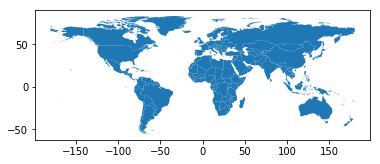

In [4]:
earth = gpd.read_file("custom.geo.json")
earth.plot()

In [47]:
# Plotting to see one meteor landing location:
# make earth the base figure
# fig, ax = plt.subplots(1, figsize=(30,20))
# base = earth.plot(ax=ax, color='#0B2380',)




In [62]:
# Function to plot one year
# geo_ISS.plot(ax=base, marker="*", markersize=10, color='#FF4179');
# fig.savefig('ISS path')

def plot_year(df, year_list, column_name_year = 'year', base_axis = base):
    """Given a base figure will plot one years worth of locations
    
        Keyword arguments:
        base_figure -- the axis of a figure and subplot, will be a plot of a shapely object. This is the base that all the years will be plotted on
        df -- pass in the geo data frame with a column that has years and a corrospointing coordinates Shapely Point objects (long, lat) to plot
        year -- enter a year as int
        column_name_year -- enter the column name of the year column
    
    """
    df_year = df[df[column_name_year] == year]
    df_year.plot(ax=base_axis, marker=".", markersize=5,  color='#FF4179')
    

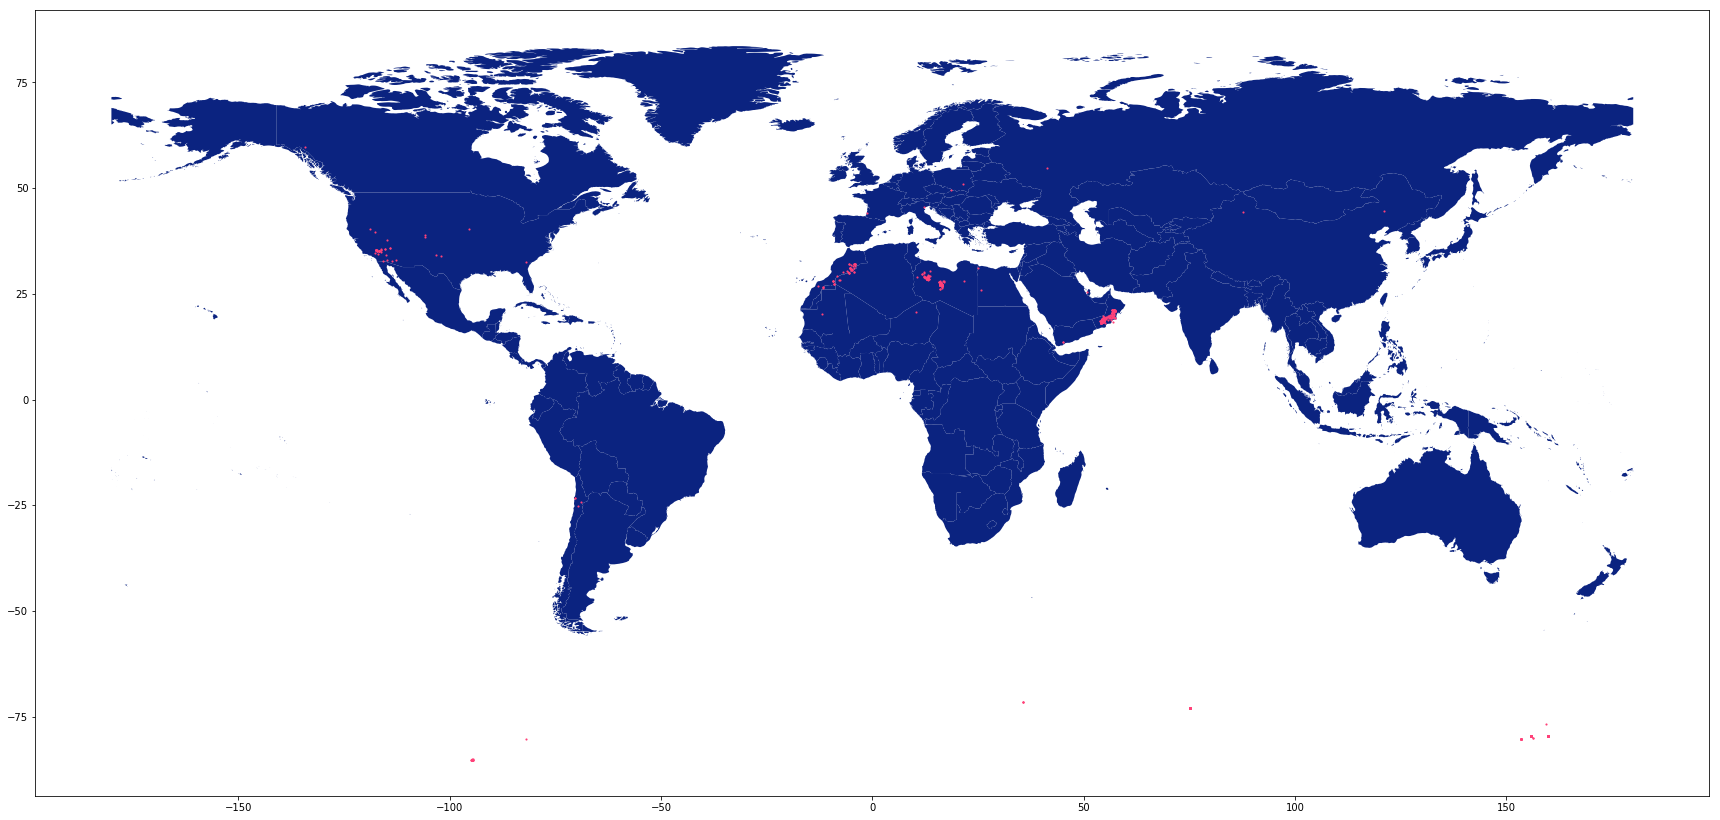

In [58]:
fig, ax = plt.subplots(1, figsize=(30,20))
base = earth.plot(ax=ax, color='#0B2380')
plot_year(geo_final, 2000, base_axis = base)

In [71]:
def plot_years(df, year, column_name_year = 'year', base_axis = base):
    """Given a base figure will plot one years worth of locations
    
        Keyword arguments:
        base_figure -- the axis of a figure and subplot, will be a plot of a shapely object. This is the base that all the years will be plotted on
        df -- pass in the geo data frame with a column that has years and a corrospointing coordinates Shapely Point objects (long, lat) to plot
        year -- enter a year as int
        column_name_year -- enter the column name of the year column
    
    """
    df_year = df[(df[column_name_year] <= year) & (df[column_name_year] > 0)]
    df_year.plot(ax=base_axis, marker=".", markersize=25,  color='#FF4179')

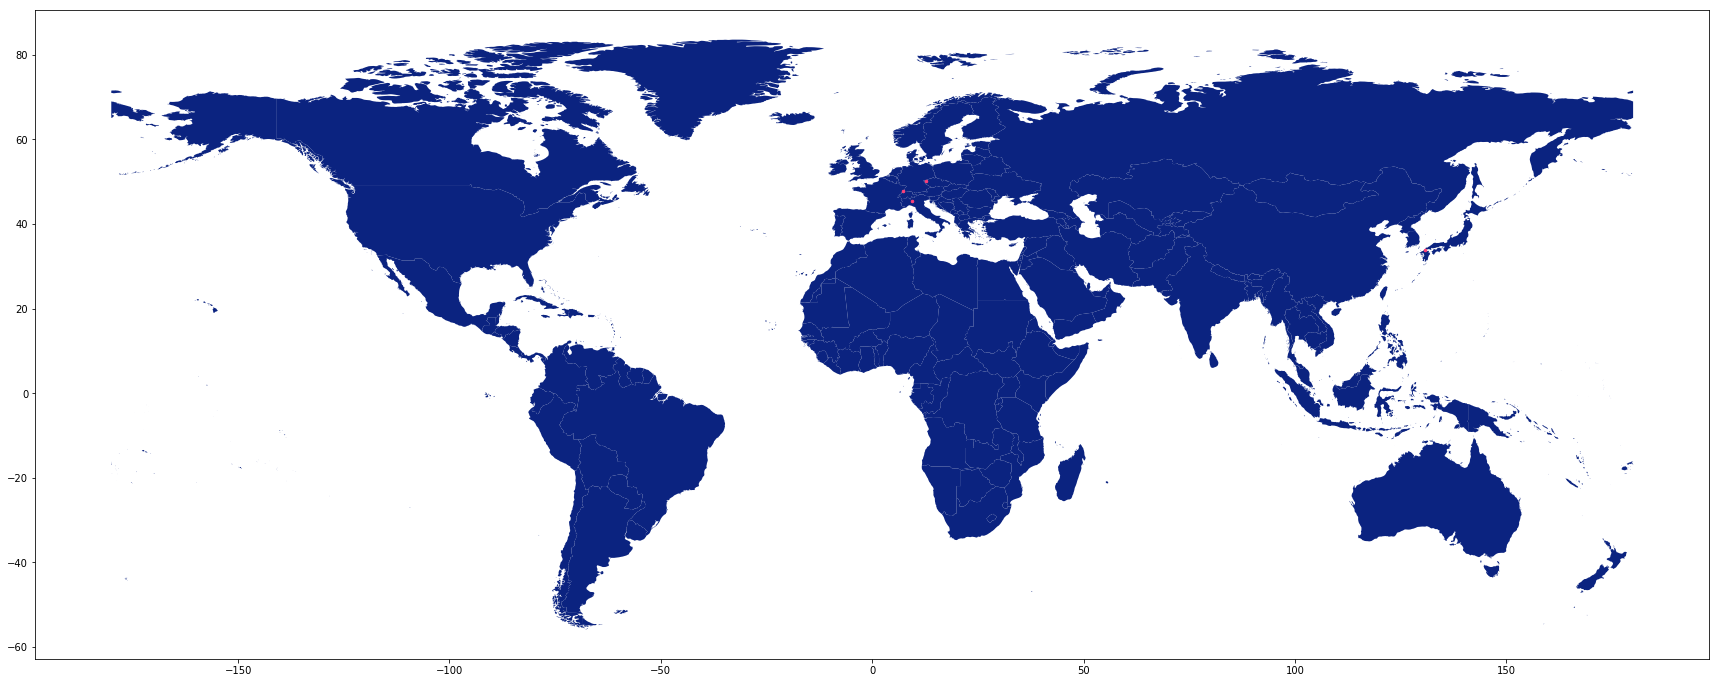

In [72]:
fig, ax = plt.subplots(1, figsize=(30,20))
base = earth.plot(ax=ax, color='#0B2380')
plot_years(geo_final, 1500, base_axis = base)

### Create a geo plotting class

In [139]:
class GEOplot:
    
    @staticmethod
    # plots one year with a previosly defined figure and base
    def plot_year(df, year, column_name_year = 'year', base_axis = base):
        """Given a base figure will plot one years worth of locations

            Keyword arguments:
            base_figure -- the axis of a figure and subplot, will be a plot of a shapely object. This is the base that all the years will be plotted on
            df -- pass in the geo data frame with a column that has years and a corrospointing coordinates Shapely Point objects (long, lat) to plot
            year -- enter a year as int
            column_name_year -- enter the column name of the year column

        """
        df_year = df[df[column_name_year] == year]
        df_year.plot(ax=base_axis, marker=".", markersize=500,  color='#FF4179')
    
    
    @staticmethod
    # plots everything before  with a previosly defined figure and base
    def plot_years(df, year, column_name_year = 'year', base_axis = base):
        """Given a base figure will plot one years worth of locations

            Keyword arguments:
            base_figure -- the axis of a figure and subplot, will be a plot of a shapely object. This is the base that all the years will be plotted on
            df -- pass in the geo data frame with a column that has years and a corrospointing coordinates Shapely Point objects (long, lat) to plot
            year -- enter a year as int
            column_name_year -- enter the column name of the year column

        """
        df_year = df[(df[column_name_year] <= year) & (df[column_name_year] > 0)]
        df_year.plot(ax=base_axis, marker=".", markersize=500,  color='#FF4179')
        

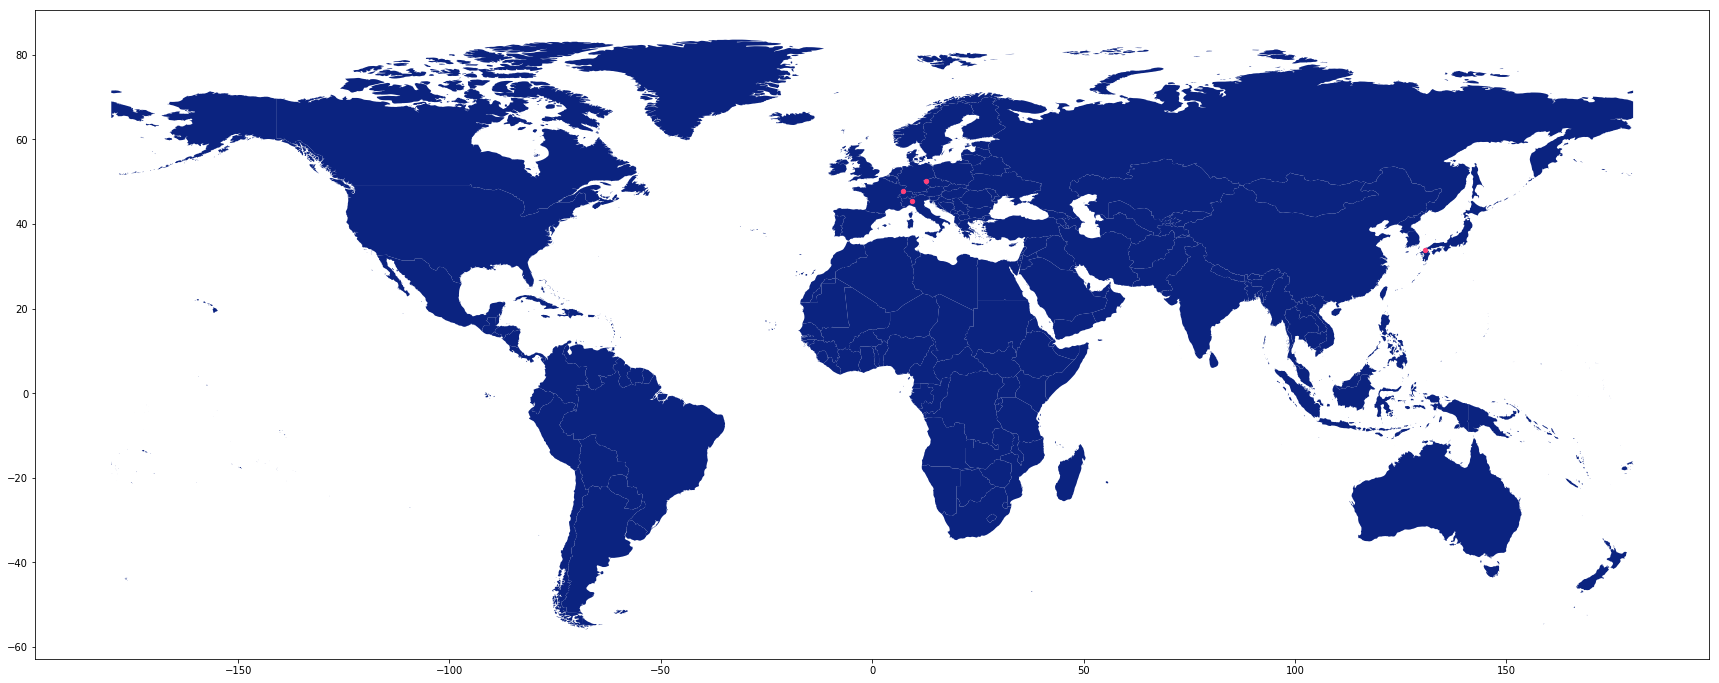

In [120]:
fig, ax = plt.subplots(1, figsize=(30,20))
base = earth.plot(ax=ax, color='#0B2380')
GEOplot.plot_years(geo_final, 1500, base_axis = base)

### Animation

In [82]:
geo_final.year.unique

<bound method Series.unique of 674       860
268      1399
817      1490
273      1491
6224     1575
167      1583
20863    1600
393      1621
919      1623
354      1628
604      1632
633      1637
996      1668
705      1671
847      1688
852      1715
24106    1716
764      1723
24188    1724
800      1740
691      1741
16932    1749
371      1751
930      1753
542      1753
19       1766
576      1768
537      1768
861      1773
821      1775
         ... 
16823       0
16882       0
20802       0
20875       0
21116       0
21118       0
21119       0
21120       0
21121       0
21122       0
21123       0
21124       0
21145       0
21224       0
21225       0
21226       0
21274       0
22900       0
22901       0
22902       0
23121       0
23885       0
24115       0
24174       0
24589       0
24661       0
24684       0
24758       0
24785       0
25234       0
Name: year, Length: 33050, dtype: int64>

In [103]:
year_list = list(geo_final.year.unique())

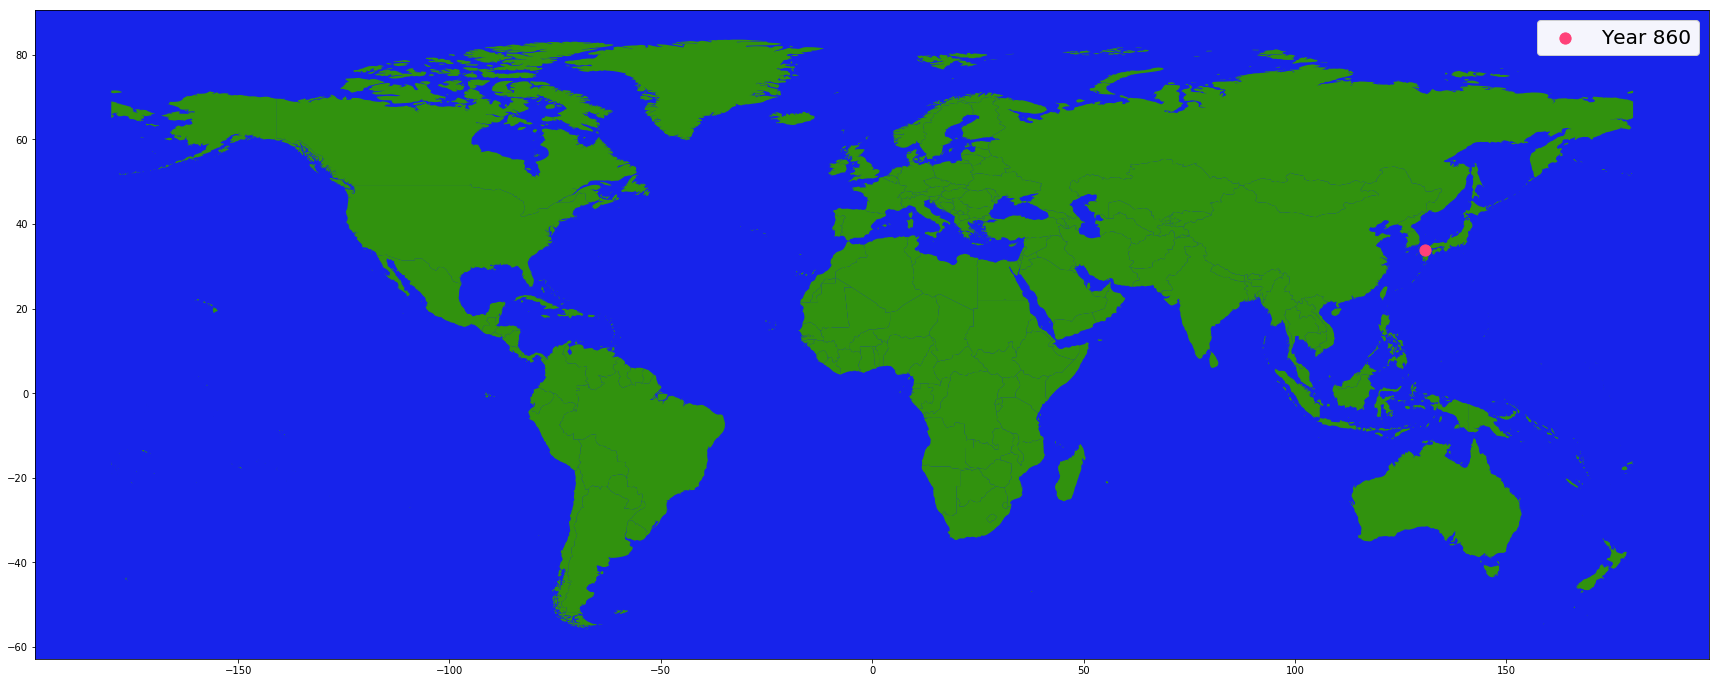

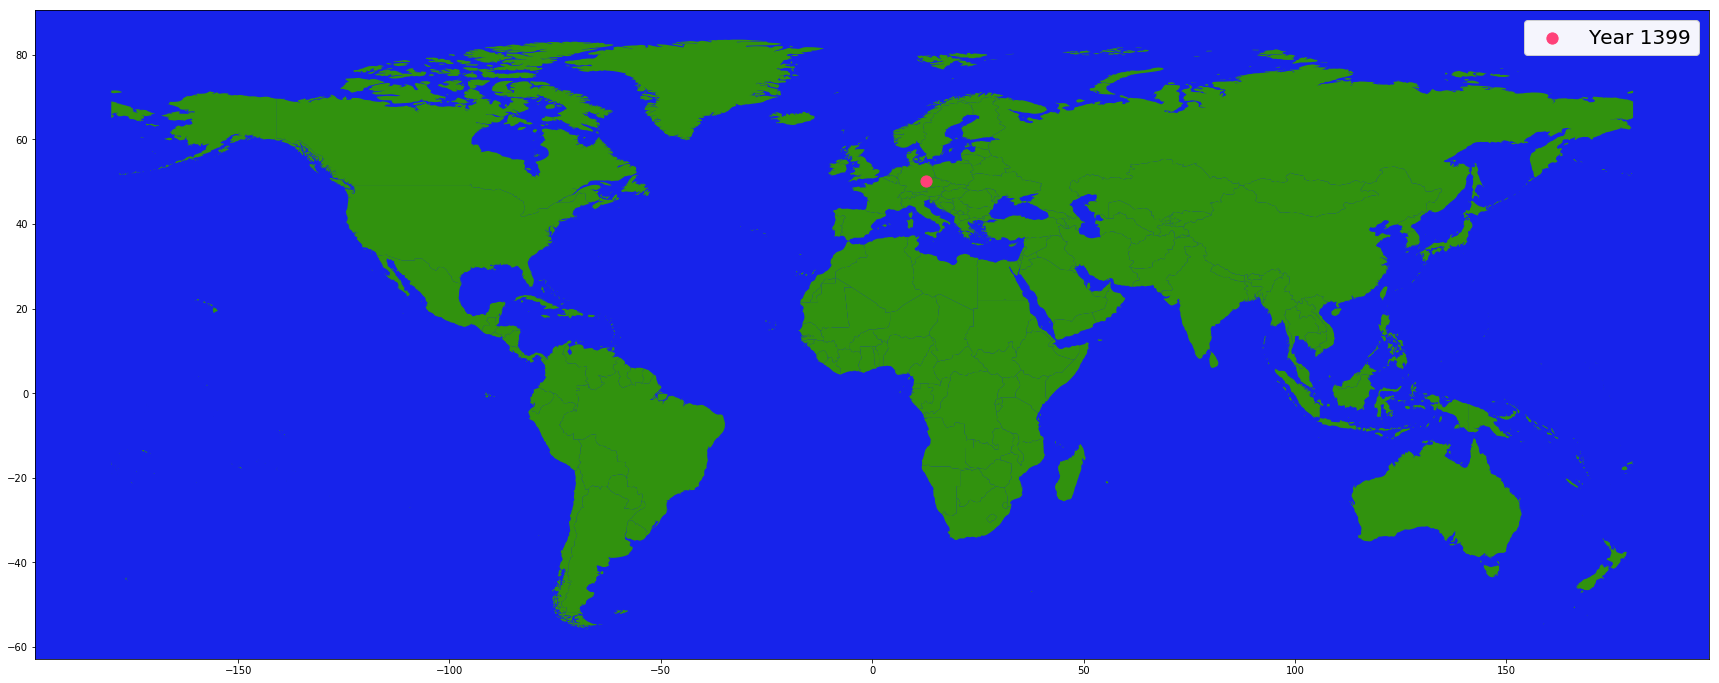

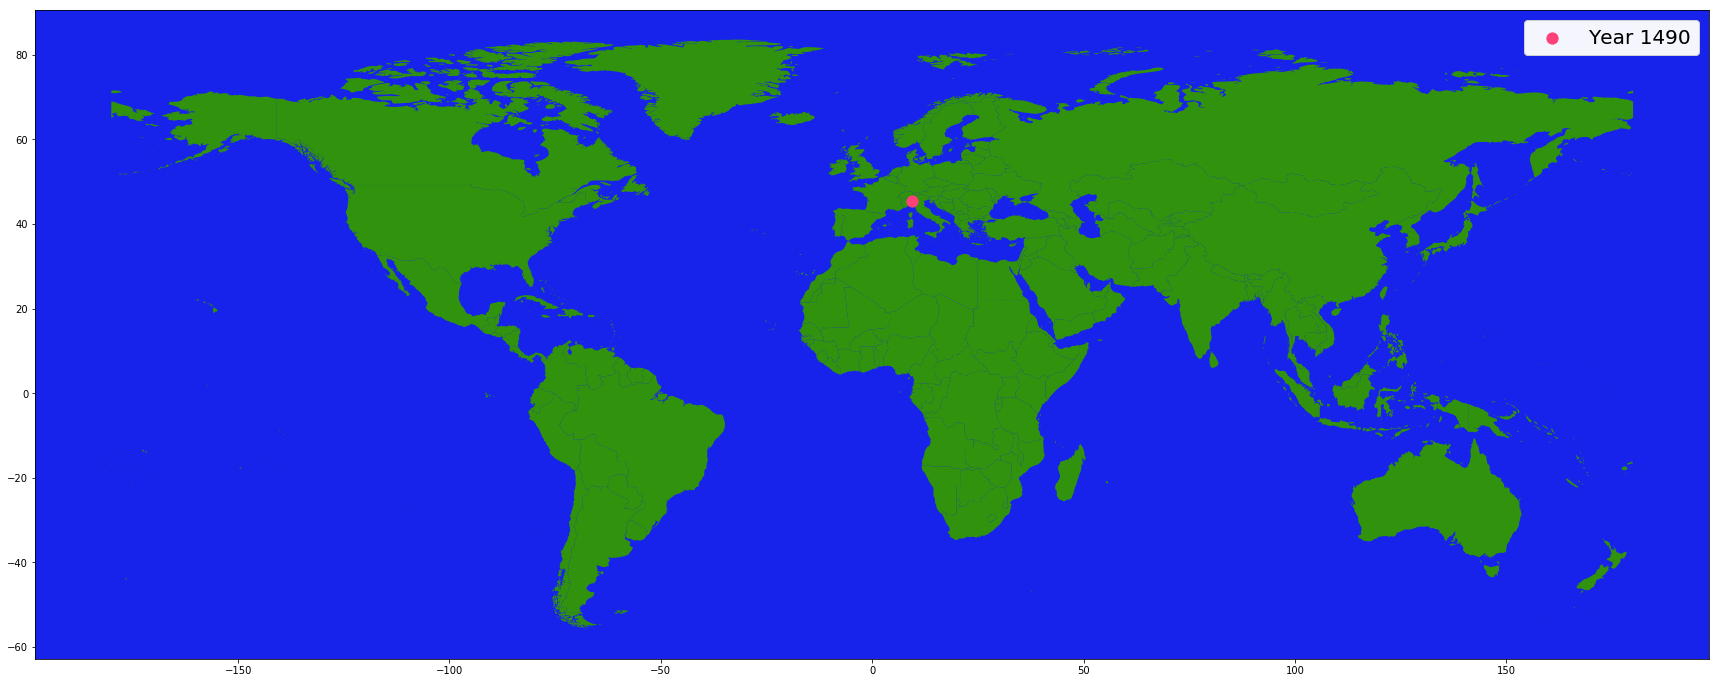

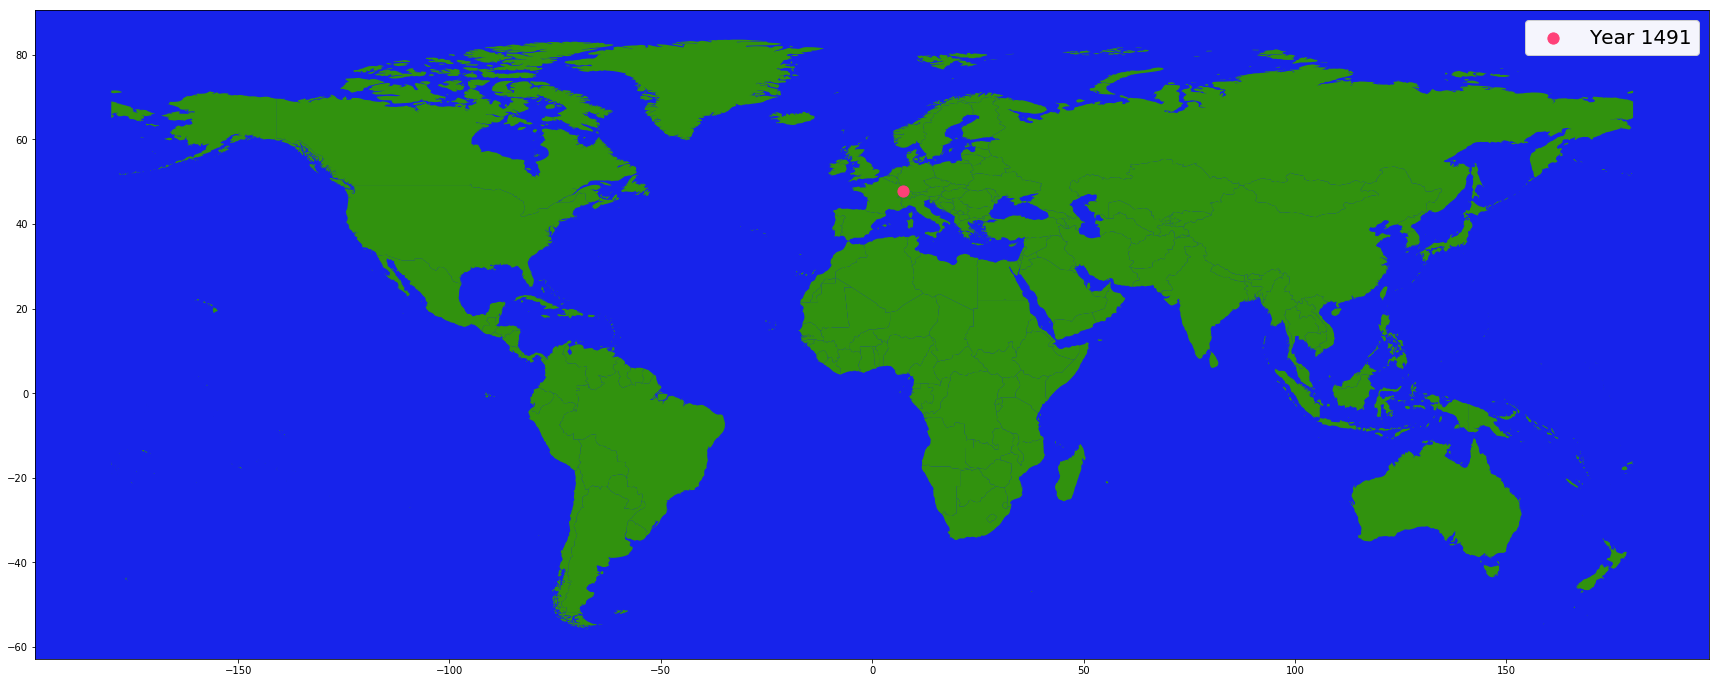

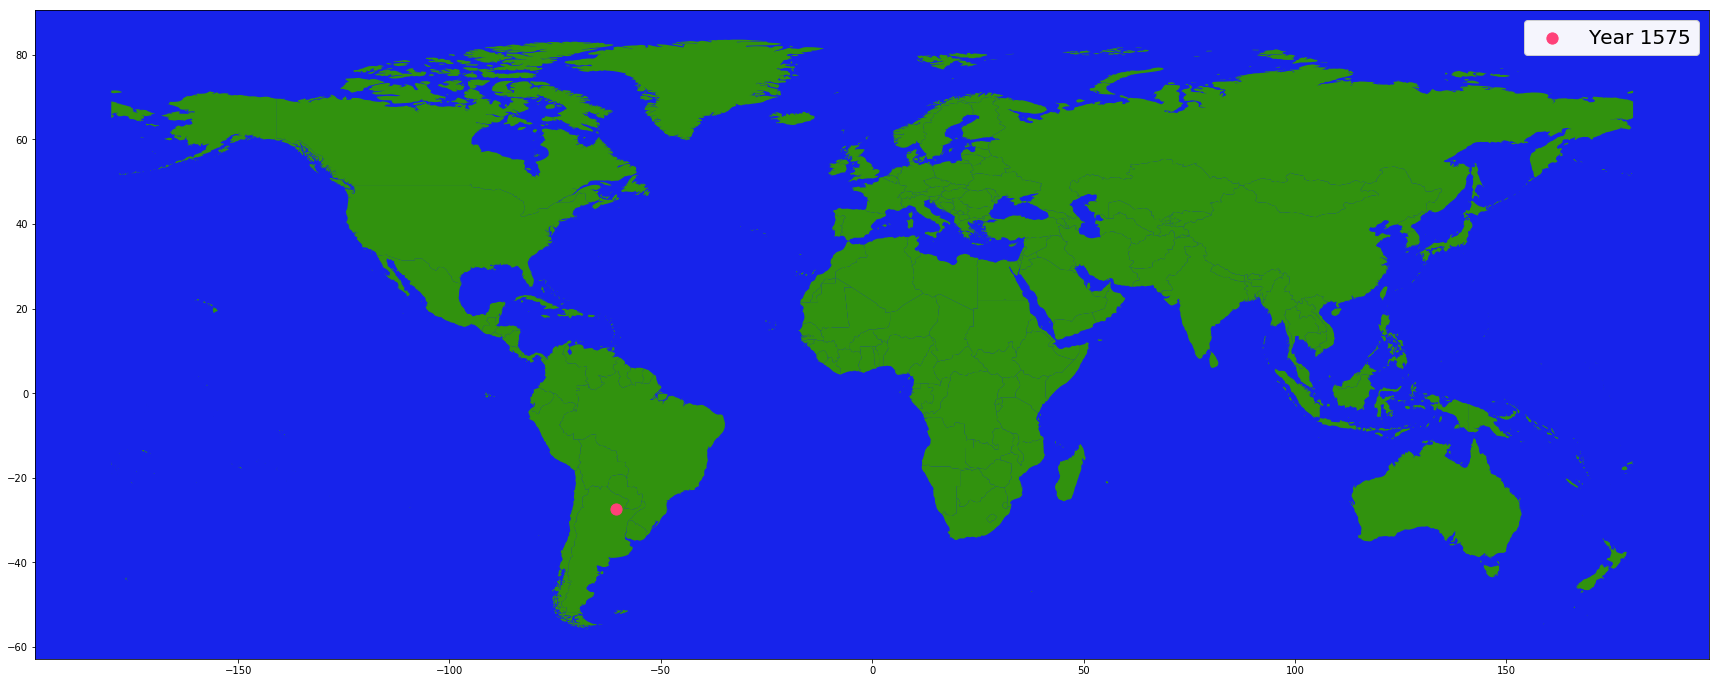

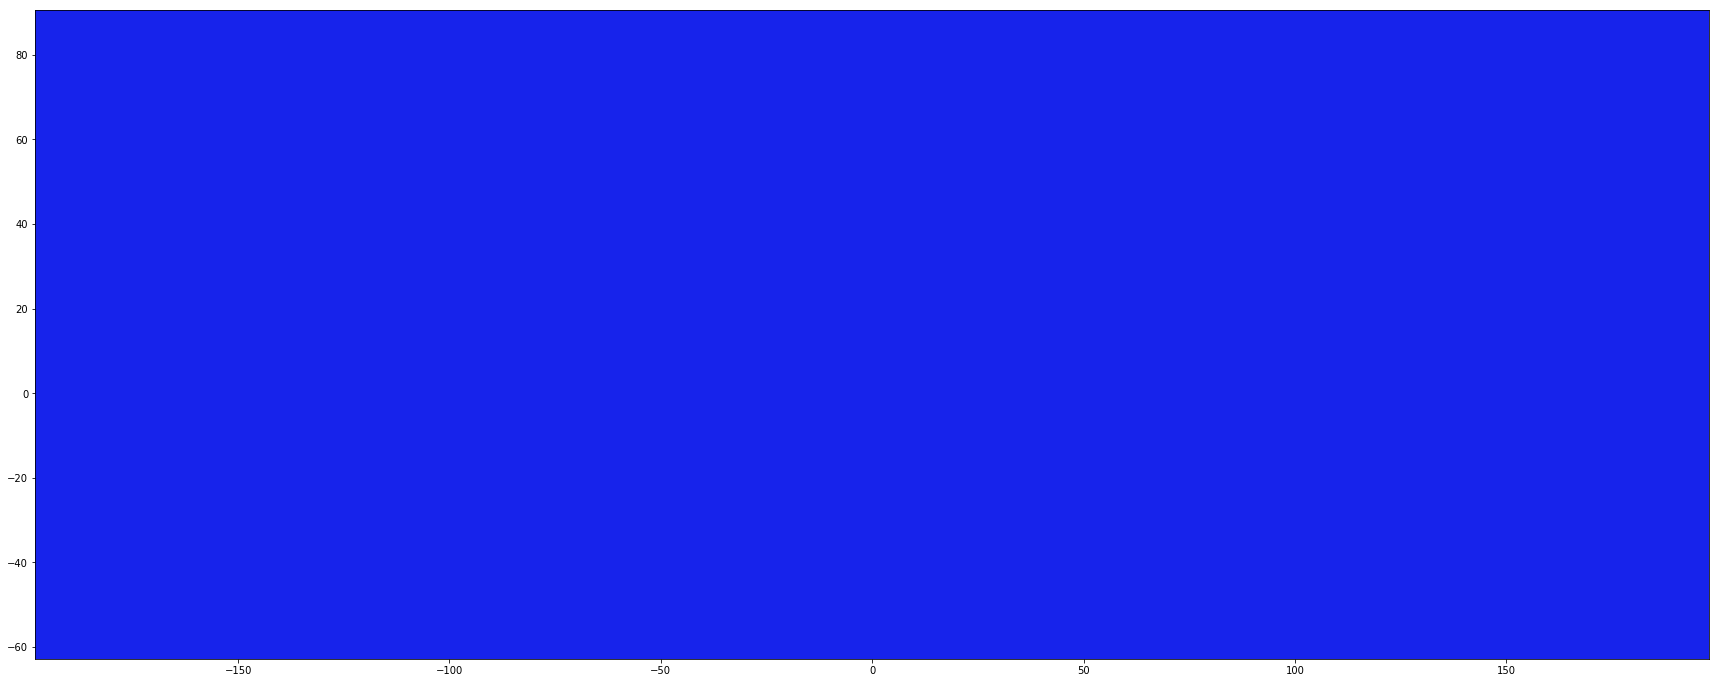

In [143]:
# fig = plt.figure()
# camera = Camera(fig)
fig, ax = plt.subplots(1, figsize=(30,20))
    camera = Camera(fig)
    base = earth.plot(ax=ax, color='#31920E')
    base.set_facecolor('#1723EB')

for i in [0,1,2,3, 4, 5]:#range(0, len(year_list)):
    # Initialize a subplot with a figure and base
    
    
    # Plot each year in turn
    GEOplot.plot_year(geo_final, year_list[i], base_axis = base)
    # Set the Legend
    plt.legend([f'Year {year_list[i]}'], fontsize=20)
    
    
    fig.savefig(f'meteor_strikes/year_{year_list[i]}')
    # Snap an image of the produced  image
    camera.snap()
    
animation = camera.animate()
# animation.save('meteors.gif', writer = 'imagemagick')


In [135]:
earth.head(10)

,scalerank,featurecla,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,...,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,filename,geometry
0,3,Admin-0 country,5,Netherlands,NL1,1,2,Country,Aruba,ABW,...,Americas,Caribbean,Latin America & Caribbean,5,5,5,4,-99,ABW.geojson,"POLYGON ((-69.89912109375 12.45200195312499, -..."
1,1,Admin-0 country,4,The Bahamas,BHS,0,2,Sovereign country,The Bahamas,BHS,...,Americas,Caribbean,Latin America & Caribbean,7,7,4,-99,1,BHS.geojson,(POLYGON ((-73.02685546874994 21.1923828125000...
2,1,Admin-0 country,5,Barbados,BRB,0,2,Sovereign country,Barbados,BRB,...,Americas,Caribbean,Latin America & Caribbean,8,8,5,3,1,BRB.geojson,"POLYGON ((-59.49331054687499 13.081982421875, ..."
3,1,Admin-0 country,6,Antigua and Barbuda,ATG,0,2,Sovereign country,Antigua and Barbuda,ATG,...,Americas,Caribbean,Latin America & Caribbean,17,19,6,4,1,ATG.geojson,(POLYGON ((-61.71606445312502 17.0370117187499...
4,3,Admin-0 country,6,United Kingdom,GB1,1,2,Dependency,Bermuda,BMU,...,Americas,Northern America,North America,7,7,5,4,-99,BMU.geojson,"POLYGON ((-64.73027343749999 32.29345703125, -..."
5,1,Admin-0 country,5,Costa Rica,CRI,0,2,Sovereign country,Costa Rica,CRI,...,Americas,Central America,Latin America & Caribbean,10,10,4,-99,1,CRI.geojson,"POLYGON ((-83.64199218749999 10.917236328125, ..."
6,1,Admin-0 country,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,...,Americas,Northern America,North America,6,6,4,-99,1,CAN.geojson,(POLYGON ((-59.78759765624998 43.9395996093749...
7,1,Admin-0 country,6,United Kingdom,GB1,1,2,Dependency,Anguilla,AIA,...,Americas,Caribbean,Latin America & Caribbean,8,8,4,-99,-99,AIA.geojson,POLYGON ((-63.00122070312499 18.22177734374999...
8,1,Admin-0 country,6,Belize,BLZ,0,2,Sovereign country,Belize,BLZ,...,Americas,Central America,Latin America & Caribbean,6,6,6,-99,1,BLZ.geojson,"(POLYGON ((-87.85292968749998 17.4228515625, -..."
9,1,Admin-0 country,3,Cuba,CUB,0,2,Sovereign country,Cuba,CUB,...,Americas,Caribbean,Latin America & Caribbean,4,4,4,-99,1,CUB.geojson,(POLYGON ((-82.56176757812503 21.5716796875000...
